# CatBoostClassifier

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


In [93]:
df_train = pd.read_csv("train_data.csv",index_col=0)
df_test = pd.read_csv("test_data.csv",index_col=0)
print(df_train.shape)
print(df_test.shape)

(318438, 17)
(137057, 16)


## Preprocessing

In [94]:
def Convert_to_Num(df):
    dept_lst = df["Department"].unique()
    dept_lst.sort()
    dept_dict = dict(zip(dept_lst, range(len(dept_lst))))
    df.Department.replace(dept_dict, inplace=True)
    print(dept_dict)
    
    HRC_lst = df["Hospital_region_code"].unique()
    HRC_lst.sort()
    HRC_dict = dict(zip(HRC_lst, range(len(HRC_lst))))
    df.Hospital_region_code.replace(HRC_dict, inplace=True)
    print(HRC_dict)
    
    ward_lst = df["Ward_Type"].unique()
    ward_lst.sort()
    ward_dict = dict(zip(ward_lst, range(len(ward_lst))))
    df.Ward_Type.replace(ward_dict, inplace=True)
    print(ward_dict)
    
    WFC_lst = df["Ward_Facility_Code"].unique()
    WFC_lst.sort()
    WFC_dict = dict(zip(WFC_lst, range(len(WFC_lst))))
    df.Ward_Facility_Code.replace(WFC_dict, inplace=True)
    print(WFC_dict)
    
    TOA_lst = df["Type of Admission"].unique()
    TOA_lst.sort()
    TOA_dict = dict(zip(TOA_lst, range(len(TOA_lst))))
    df["Type of Admission"].replace(TOA_dict, inplace=True)
    print(TOA_dict)
    
    age_lst = df["Age"].unique()
    age_lst.sort()
    age_dict = dict(zip(age_lst, range(len(age_lst))))
    df["Age"].replace(age_dict, inplace=True)
    print(age_dict)
    
    HTC_lst = df["Hospital_type_code"].unique()
    HTC_lst.sort()
    HTC_dict = dict(zip(HTC_lst, range(len(HTC_lst))))
    df["Hospital_type_code"].replace(HTC_dict, inplace=True)
    print(HTC_dict)
    
    
Convert_to_Num(df_train)
stay_list = df_train["Stay"].unique()
stay_list.sort()
dept_Stay = dict(zip(stay_list, range(len(stay_list))))
df_train["Stay"].replace(dept_Stay, inplace=True)
df_train['Severity of Illness'] = df_train['Severity of Illness'].map({'Minor': 1,'Moderate': 2,'Extreme': 3})
print(dept_Stay)
df_train["Bed Grade"] = df_train["Bed Grade"].fillna(2)

{'TB & Chest disease': 0, 'anesthesia': 1, 'gynecology': 2, 'radiotherapy': 3, 'surgery': 4}
{'X': 0, 'Y': 1, 'Z': 2}
{'P': 0, 'Q': 1, 'R': 2, 'S': 3, 'T': 4, 'U': 5}
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5}
{'Emergency': 0, 'Trauma': 1, 'Urgent': 2}
{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}
{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6}
{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9, 'More than 100 Days': 10}


In [95]:
df_train.isnull().sum()

Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                               0
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

## Group Features

In [78]:
def featureGroup(df_train):
    df_train["Bed Grade"] = df_train["Bed Grade"].fillna(2)
    
    df_train['mean_Hospital_code_Deposit']=df_train.groupby(['Hospital_code'])['Admission_Deposit'].transform('mean')
    df_train['min_Hospital_code_Deposit']=df_train.groupby(['Hospital_code'])['Admission_Deposit'].transform('min')
    df_train['max_Hospital_code_Deposit']=df_train.groupby(['Hospital_code'])['Admission_Deposit'].transform('max')
    df_train['diff_Hospital_code_Deposit']=df_train['max_Hospital_code_Deposit']-df_train['min_Hospital_code_Deposit']
    df_train['mean_Hospital_code_BedGrade_Deposit']=df_train.groupby(['Hospital_code'])['Bed Grade'].transform('mean')


    df_train['mean_SeverityDeposit']=df_train.groupby(['Severity of Illness'])['Admission_Deposit'].transform('mean')
    df_train['min_SeverityDeposit']=df_train.groupby(['Severity of Illness'])['Admission_Deposit'].transform('min')
    df_train['max_SeverityDeposit']=df_train.groupby(['Severity of Illness'])['Admission_Deposit'].transform('max')
    df_train['diff_SeverityDeposit']=df_train['max_SeverityDeposit']-df_train['min_SeverityDeposit']
    df_train['mean_Hospital_code_Severity']=df_train.groupby(['Hospital_type_code'])['Severity of Illness'].transform('mean')
    
    df_train['sumVisitorsPatient']=df_train.groupby(['patientid'])['Visitors with Patient'].transform('sum')
    df_train['meanVisitorsPatient']=df_train.groupby(['patientid'])['Visitors with Patient'].transform('mean')
    df_train['countPatient']=df_train.groupby(['patientid'])['Admission_Deposit'].transform('count')
    
    df_train['maxPatientDeposit']=df_train.groupby(['patientid'])['Admission_Deposit'].transform('max')
    df_train['minPatientDeposit']=df_train.groupby(['patientid'])['Admission_Deposit'].transform('min')
    df_train['meanPatientDeposit']=df_train.groupby(['patientid'])['Admission_Deposit'].transform('mean')
    
    
    df_train['SeverityCount']=df_train.groupby('Hospital_code')['Severity of Illness'].transform('count')
    df_train['SeverityGradeCount']=df_train.groupby(['Hospital_code','Severity of Illness','Bed Grade'])['Available Extra Rooms in Hospital'].transform('count')
    df_train['SeverityGradeMean']=df_train.groupby(['Hospital_code','Severity of Illness','Bed Grade'])['Available Extra Rooms in Hospital'].transform('mean')
    df_train['roomDepartment_mean']=df_train.groupby(['Hospital_code','Department','Bed Grade'])['Available Extra Rooms in Hospital'].transform('mean')
    df_train['Department_count']=df_train.groupby(['Hospital_code','Department'])['Bed Grade'].transform('count')


    df_train['wardFacility_count']=df_train.groupby(['Hospital_code','Ward_Type','Ward_Facility_Code'])['Admission_Deposit'].transform('count')
    df_train['wardFacility_mean']=df_train.groupby(['Hospital_code','Ward_Type','Ward_Facility_Code'])['Admission_Deposit'].transform('mean')
    df_train['Admission_count']=df_train.groupby(['Hospital_code','Type of Admission'])['Admission_Deposit'].transform('mean')
    
    
    return df_train


In [99]:
df_train=featureGroup(df_train)
df_train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,...,SeverityGradeCount,SeverityGradeSum,SeverityGradeMean,room_Sum,room_count,roomDepartment_count,Department_count,ward_count,wardFacility_count,Admission_count
case_id,,,,,,,,,,,,,,,,,,,,,
1,8,2,3,2,3,3,2,5,2.0,31397,...,270,971,3.596296,12632,3663,775,235,5034.789895,5034.789895,4837.363495
2,2,2,5,2,2,3,3,5,2.0,31397,...,367,1021,2.782016,13737,5102,1135,444,5037.976996,5037.976996,5084.350735
3,10,4,1,0,2,1,3,4,2.0,31397,...,626,2030,3.242812,29185,9435,1937,763,4564.486800,4564.486800,4618.402009
4,26,1,2,1,2,3,2,3,2.0,31397,...,2528,8518,3.369462,109008,33076,10890,3519,4975.934545,4975.934545,4990.976460
5,26,1,2,1,2,3,3,3,2.0,31397,...,2528,8518,3.369462,109008,33076,10890,3519,4917.667741,4917.667741,4990.976460


In [105]:
def dropFeature(df,check=True):
    #x = df.drop(columns=["City_Code_Patient", "patientid","Hospital_type_code","City_Code_Hospital",
    #                       "Hospital_region_code","Admission_Deposit","Hospital_code",
    #                      "Available Extra Rooms in Hospital","Ward_Type","Ward_Facility_Code"])
    
    x = df.drop(columns=["City_Code_Patient", "patientid","Hospital_code",])
    if (check == True):
        x = x.drop(columns=["Stay"])
    return x

In [106]:
y = df_train.Stay
x = dropFeature(df_train)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [108]:
x_train.isnull().sum()

Hospital_type_code                     0
City_Code_Hospital                     0
Hospital_region_code                   0
Available Extra Rooms in Hospital      0
Department                             0
Ward_Type                              0
Ward_Facility_Code                     0
Bed Grade                              0
Type of Admission                      0
Severity of Illness                    0
Visitors with Patient                  0
Age                                    0
Admission_Deposit                      0
mean_Hospital_code_Deposit             0
min_Hospital_code_Deposit              0
max_Hospital_code_Deposit              0
diff_Hospital_code_Deposit             0
mean_Hospital_code_BedGrade_Deposit    0
mean_SeverityDeposit                   0
min_SeverityDeposit                    0
max_SeverityDeposit                    0
diff_SeverityDeposit                   0
mean_Hospital_code_Severity            0
sumVisitorsPatient                     0
minVisitorsPatie

## Training the CatBoost Classification model on the Training set

0:	learn: 0.3924593	test: 0.3915965	best: 0.3915965 (0)	total: 2.6s	remaining: 34m 37s
50:	learn: 0.4158155	test: 0.4105326	best: 0.4105954 (49)	total: 2m 22s	remaining: 34m 53s
100:	learn: 0.4250599	test: 0.4154472	best: 0.4155728 (96)	total: 4m 23s	remaining: 30m 24s
150:	learn: 0.4320667	test: 0.4180536	best: 0.4181635 (148)	total: 6m 26s	remaining: 27m 43s
200:	learn: 0.4374132	test: 0.4199064	best: 0.4199535 (195)	total: 8m 23s	remaining: 25m 1s
250:	learn: 0.4423081	test: 0.4208956	best: 0.4213039 (245)	total: 10m 18s	remaining: 22m 32s
300:	learn: 0.4476860	test: 0.4217121	best: 0.4218691 (291)	total: 12m 15s	remaining: 20m 19s
350:	learn: 0.4527223	test: 0.4227798	best: 0.4227798 (342)	total: 14m 6s	remaining: 18m 3s
400:	learn: 0.4574210	test: 0.4229839	best: 0.4230310 (382)	total: 16m 1s	remaining: 15m 56s
450:	learn: 0.4624141	test: 0.4240830	best: 0.4241929 (449)	total: 17m 49s	remaining: 13m 47s
500:	learn: 0.4671482	test: 0.4244442	best: 0.4245070 (466)	total: 19m 37s	rem

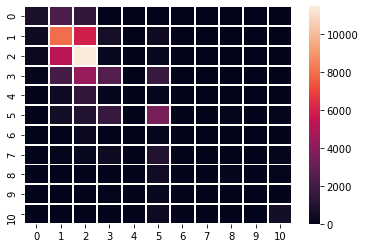

catboost Acc :  0.7591373635891218


In [109]:
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_confusion_matrix

eval_dataset = Pool(x_test,
                    y_test)

model = CatBoostClassifier(iterations=800,
                           learning_rate=0.03,
                           depth=10,
                           l2_leaf_reg = 3,
                           loss_function='MultiClass',
                           eval_metric='Accuracy')


model.fit(x_train,
          y_train,
          eval_set=eval_dataset,
          verbose=50)



print(model.get_best_score())
cm = get_confusion_matrix(model, eval_dataset)
print(cm)
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
ax = sns.heatmap(cm, linewidth=1)
plt.show()
print("catboost Acc : ", predict_accuracy_on_test_set)

## Training Result

In [111]:
import catboost
pred = model.predict(
                 eval_dataset, 
                 verbose=True)

In [112]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.4255275719130762

## Predicting the Test set results

In [155]:
df_test = pd.read_csv("test_data.csv",index_col=0)
df_test["Bed Grade"] = df_test["Bed Grade"].fillna(2)
Convert_to_Num(df_test)
df_test['Severity of Illness'] = df_test['Severity of Illness'].map({'Minor': 1,'Moderate': 2,'Extreme': 3})
df_test=featureGroup(df_test)
df_test = dropFeature(df_test,check=False)
eval_dt = Pool(df_test)
preds_class = model.predict(eval_dt)
preds_class.shape

{'TB & Chest disease': 0, 'anesthesia': 1, 'gynecology': 2, 'radiotherapy': 3, 'surgery': 4}
{'X': 0, 'Y': 1, 'Z': 2}
{'P': 0, 'Q': 1, 'R': 2, 'S': 3, 'T': 4, 'U': 5}
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5}
{'Emergency': 0, 'Trauma': 1, 'Urgent': 2}
{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}
{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6}


(137057, 1)

In [157]:
df_sub = pd.DataFrame(index=df_test.index)
df_sub["Stay"] = preds_class
swap_dict_Stay = dict([(value, key) for key, value in dept_Stay.items()])
df_sub["Stay"].replace(swap_dict_Stay, inplace=True)
df_sub.head()

,Stay
case_id,
318439,0-10
318440,51-60
318441,21-30
318442,21-30
318443,51-60


## Save test result

In [158]:
df_sub.to_csv("SubmissionCat.csv")